In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import pickle
import pandas as pd
import os
import json
import pyarrow as pa
import hist
import pickle

In [2]:
path = '/project01/ndcms/cmoore24/skims/full_cut_skims/sole_vars/'

In [208]:
hgg = ak.firsts(ak.from_parquet(f'{path}hgg.parquet'))

In [209]:
hgg = hgg[hgg.msoftdrop < 200]
hgg = hgg[hgg.msoftdrop > 40]
hgg = hgg[hgg.pt > 450]
hgg = hgg[hgg.pt < 600]

In [210]:
qcd = {}
files = os.listdir(f'{path}')
for i in files:
    if 'qcd' in i:
        qcd[i.rstrip('.parquet')] = ak.firsts(ak.from_parquet(f'{path}/{i}'))

In [211]:
for i in qcd:
    qcd[i] = qcd[i][qcd[i].msoftdrop < 200]
    qcd[i] = qcd[i][qcd[i].msoftdrop > 40]
    qcd[i] = qcd[i][qcd[i].pt > 450]
    qcd[i] = qcd[i][qcd[i].pt < 600]

In [212]:
with open('event_total.json', 'r') as f:
    totals = json.load(f)
qcd_totals = totals['qcd']

In [213]:
qcd_counts = {}
for i in qcd_totals:
    qcd_counts[f'qcd_{i}'] = qcd_totals[i]

In [214]:
IL = 44.99

In [215]:
xsec = {}
xsec['qcd_300to470'] = 6833
xsec['qcd_470to600'] = 549.5
xsec['qcd_600to800'] = 156.5
xsec['qcd_800to1000'] = 26.22
xsec['qcd_1000to1400'] = 7.475
xsec['qcd_1400to1800'] = 0.6482
xsec['qcd_1800to2400'] = 0.08742
xsec['qcd_2400to3200'] = 0.005237
xsec['qcd_3200toInf'] = 0.0001353

In [329]:
qcd_var = {}
for i in qcd:
    var_hist = hist.Hist.new.Reg(40, 0.5, 4, name=f"Var", label=f"Var").Weight()
    var_hist.fill(Var=(qcd[i].mass/qcd[i].msoftdrop))
    qcd_var[i] = var_hist

In [330]:
hgg_var = hist.Hist.new.Reg(40, 0.5, 4, name=f"Var", label=f"Var").Weight()
hgg_var.fill(Var=(hgg.mass/hgg.msoftdrop))

Hist(Regular(40, 0.5, 4, name='Var'), storage=Weight()) # Sum: WeightedSum(value=56399, variance=56399)

In [331]:
ak.max((qcd['qcd_470to600'].mass/qcd['qcd_470to600'].msoftdrop)), ak.max((hgg.mass/hgg.msoftdrop))

(4.461421, 3.8308992)

In [332]:
for i in qcd_var:
    scale = ((44.99*(xsec[i]*1000))/qcd_counts[i])
    qcd_var[i].view(flow=True)[:] *= scale

In [333]:
scaleHgg = ((44.99*(0.471*1000)*0.0817)/(totals['hgg']))
hgg_var.view(flow=True)[:] *= scale

In [334]:
bkg_var = sum(qcd_var[i] for i in qcd_var)

In [335]:
var_bckgrd_total = bkg_var[0:40:sum]
hgg_total = hgg_var[0:40:sum]

In [336]:
var_false_positive = []
for i in range(1, 41):
    var_false_positive.append(bkg_var[0:i:sum].value/var_bckgrd_total.value)

In [337]:
hgg_var_true_positive = []
for i in range(1, 41):
    hgg_var_true_positive.append(hgg_var[0:i:sum].value/hgg_total.value)

In [338]:
with open('resampled.pkl', 'rb') as f:
    resampled = pickle.load(f)

In [339]:
with open('scaled.pkl', 'rb') as f:
    scaled = pickle.load(f)

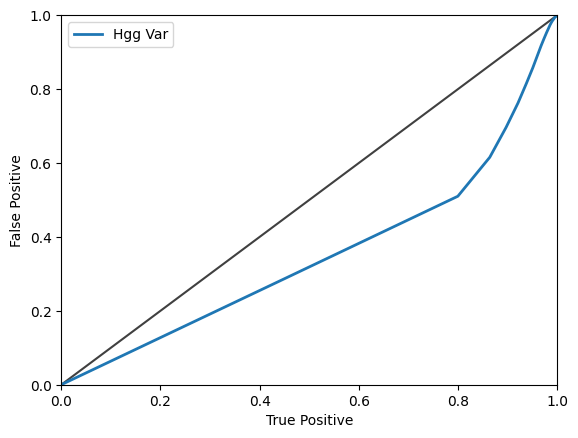

In [340]:
fig, ax = plt.subplots()
ax.plot( hgg_var_true_positive, var_false_positive, linewidth=2.0, label='Hgg Var')
# ax.plot(scaled['tpr'], scaled['fpr'], linewidth=2.0, label='Scaled Var')
# ax.plot(resampled['tpr'], resampled['fpr'], linewidth=2.0, label='Resampled Var')
plt.xlabel("True Positive")
plt.ylabel("False Positive")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

In [295]:
hgg_var_true_positive.reverse()

In [296]:
hgg_var_true_positive

[0.0022872745970673237,
 0.015603113530381744,
 0.050107271405521375,
 0.10812248444121349,
 0.18292877533289595,
 0.2685153992092058,
 0.35755953119736156,
 0.44834128264685535,
 0.5350626784162839,
 0.6124931293108032,
 0.6825475629000514,
 0.7441089381017394,
 0.7979396797815564,
 0.8438802106420327,
 0.8799092182485505,
 0.9093423642263161,
 0.933385343711768,
 0.9518431177857765,
 0.96592138158478,
 0.9761875210553379,
 0.9834748843064594,
 0.9887763967446231,
 0.9921452508023192,
 0.9943970637777265,
 0.9962233372932144,
 0.9971985318888633,
 0.9981382648628522,
 0.9987588432419016,
 0.9991311902693311,
 0.9994680756751005,
 0.9996808454050603,
 0.9997694994592102,
 0.9998758843241902,
 0.99994680756751,
 0.99994680756751,
 0.99998226918917,
 1.0,
 1.0,
 1.0,
 1.0]